# <center> Tình hình dịch bệnh Covid-19 tại Việt Nam

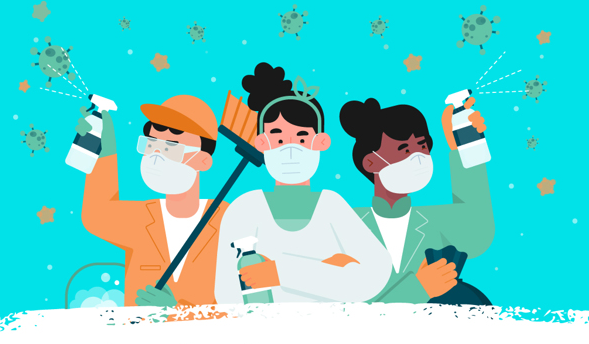

### Tổng quan dự án:
Dự án nhằm tìm hiểu sơ bộ về tình hình dịch bệnh Covid-19 tại Việt Nam thông qua dữ liệu được cung cấp trực tuyến bởi đại học Johns Hopkins (JHU). Qua dự án, người thực hiện muốn luyện tập, nâng cao khả năng sử dụng ngôn ngữ Python trong việc khai phá, đối chiếu, phân tích, trực quan dữ liệu Covid-19, đồng thời điểm lại một số cột mốc đáng nhớ trong quá trình phòng chống dịch Covid-19 tại Việt Nam.

Dự án sử dụng 2 thư viện chính là: Pandas (tìm hiểu, xử lý dữ liệu) và Matplotlib (trực quan dữ liệu)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import shutup
shutup.please()
from matplotlib.ticker import StrMethodFormatter

In [9]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [10]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/16/22,4/17/22,4/18/22,4/19/22,4/20/22,4/21/22,4/22/22,4/23/22,4/24/22,4/25/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,178387,178418,178457,178513,178574,178611,178638,178648,178689,178745
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,274462,274504,274520,274535,274606,274606,274737,274791,274828,274828
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265739,265739,265741,265746,265746,265754,265761,265761,265767,265771
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,40709,40709,40709,40709,41013,41013,41013,41013,41013,41013
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99194,99194,99194,99287,99287,99287,99287,99287,99287,99287


JHU cung cấp 3 bộ dữ liệu về số người nhiễm bệnh, số người chết và số người hồi phục của tất cả các nước trên toàn thế giới. Trong mỗi bộ dữ liệu sễ có thông tin tên nước, kinh độ, vĩ độ, tổng số lượng ca (tích lũy) tính từ ngày 22/01/2020 đến nay

In [11]:
#Lọc dữ liệu của Việt Nam
vietnam_confirmed_df = confirmed_df[confirmed_df['Country/Region'] == 'Vietnam']
vietnam_death_df = deaths_df[deaths_df['Country/Region'] == 'Vietnam']
vietnam_recoveries_df = recoveries_df[recoveries_df['Country/Region'] == 'Vietnam']

In [12]:
#Số liệu ca tử vong từ dữ liệu của JHU bị sai ngày 28/02/2022 và 01/03/2022 so với số liệu công bố của cục y tế dự phòng của VN
#tại đường dẫn https://vncdc.gov.vn/ dẫn đến số ca tăng mới trong ngày bị âm, cần cập nhật lại
vietnam_death_df['2/28/22'] = 40252
vietnam_death_df['3/01/22'] = 40608

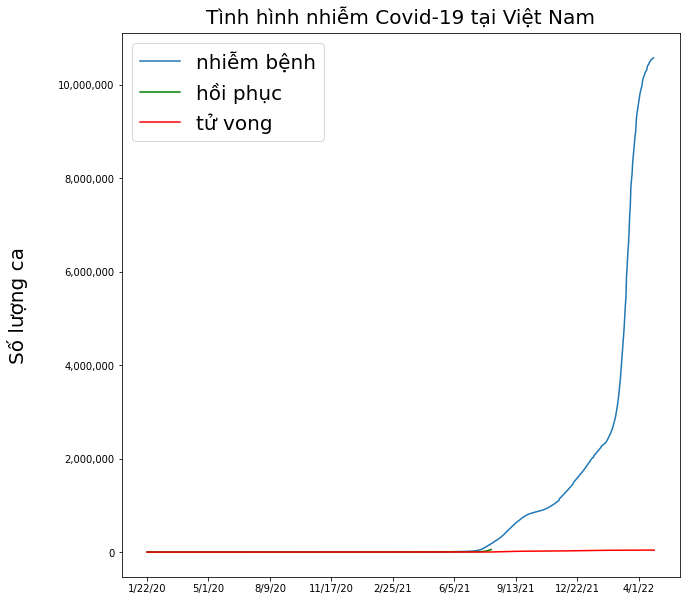

In [31]:
timeseries1 = vietnam_confirmed_df.iloc[:,4:]
x1 = timeseries1.columns
y1 = timeseries1.iloc[0]
plt.figure(figsize = (10,10))
plt.ticklabel_format(style = 'plain')
plt.title('Tình hình nhiễm Covid-19 tại Việt Nam', pad = 10, fontsize = 20)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) 
plt.ylabel('Số lượng ca', labelpad = 30, fontsize = 20) 

#Plot line chart confirmed case
plt.plot(x1,y1, label='nhiễm bệnh')
plt.xticks(x1[::100])

#Plot line chart recovery case
timeseries3 = vietnam_recoveries_df.loc[:,'1/22/20':'8/4/21']
x3 = timeseries3.columns
y3 = timeseries3.iloc[0]
plt.plot(x3,y3, color = 'green',label='hồi phục')

#Plot line chart death case
timeseries2 = vietnam_death_df.iloc[:,4:]
x2 = timeseries2.columns
y2 = timeseries2.iloc[0]
plt.plot(x2,y2, color = 'red', label='tử vong')

plt.legend(loc='upper left', frameon=True, fontsize = 20)

plt.show()


JHU ngừng cung cấp dữ liệu về số ca hồi phục từ ngày 08/05/2021 (Aug 5 2021), do đó dữ liệu này sẽ chỉ đến 08/04/2021 (Aug 4 2021) là tạm dừng.

Số lượng ca nhiễm tại Việt Nam bắt đầu tăng nhanh từ tháng 05/2021, trùng với khoảng thời gian TP.Hồ Chí Minh bắt đầu thực hiện giãn cách theo chỉ thị 15 và 16. 


In [14]:
#Tính toán dữ liệu người nhiễm bệnh và người tử vong do covid-19 mỗi ngày, bằng cách lấy hiệu của tổng số ca ngày hôm nay 
#và số ca ngày hôm qua để ra số ca tăng mới trong ngày

vietnam_confirmedno_df = vietnam_confirmed_df.iloc[:,4:]
vietnam_deathno_df = vietnam_death_df.iloc[:,4:]

list_confirmed = list(range(0,len(vietnam_confirmedno_df.columns)-1))

vietnam_confirmedno_df_final = pd.DataFrame()
vietnam_deathno_df_final = pd.DataFrame()

for x in list_confirmed:
    vietnam_confirmedno_df_final[vietnam_confirmedno_df.columns[x+1]] =  vietnam_confirmedno_df.iloc[:,x+1] - vietnam_confirmedno_df.iloc[:,x]
    vietnam_deathno_df_final[vietnam_deathno_df.columns[x+1]] =  vietnam_deathno_df.iloc[:,x+1] - vietnam_deathno_df.iloc[:,x]

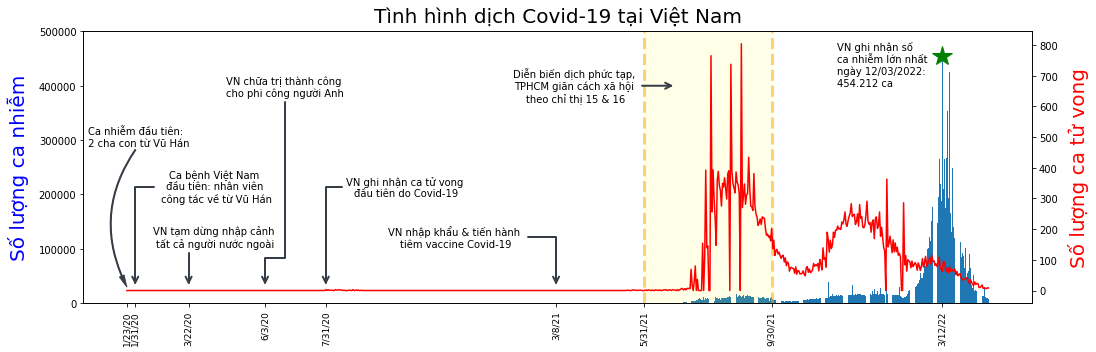

In [32]:
x_1 = vietnam_confirmedno_df_final.columns
y_1 = vietnam_confirmedno_df_final.iloc[0]
y_2 = vietnam_deathno_df_final.iloc[0]

plt.rcParams['figure.figsize'] = (17,5)
a = ['1/23/20','1/31/20','3/22/20','6/3/20','7/31/20','3/8/21','9/30/21','5/31/21','3/12/22']
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

#Plot bar chart confirmed cases everyday
ax1.bar(x_1,y_1, label='confirmed')
plt.xticks(a)
ax1.set_xticklabels(a, rotation = 90,fontsize = 9)
ax1.set_ylabel('Số lượng ca nhiễm', labelpad = 10, fontsize = 20, color = 'b') 
ax1.set_ylim(0,500000)

ax1.annotate('Ca nhiễm đầu tiên: \n 2 cha con từ Vũ Hán', xy=('1/23/20', 30000),xytext=(10,150),
            textcoords='offset points', ha="center", va="center", fontsize = 10,
            arrowprops=dict(headwidth=5, width=1,color='#363d46', connectionstyle="arc3,rad = 0.3"))
ax1.annotate('Ca bệnh Việt Nam \n đầu tiên: nhân viên \n công tác về từ Vũ Hán', xy=('1/31/20', 30000),xytext=(80,100),
            textcoords='offset points', ha="center", va="center", fontsize = 10,
            arrowprops=dict(arrowstyle="->",linewidth = 2, mutation_scale = 15, color='#363d46', connectionstyle="bar,angle = 180, fraction = 0"))
ax1.annotate('VN tạm dừng nhập cảnh \ntất cả người nước ngoài', xy=('3/22/20', 30000),xytext=(27,50),
             textcoords='offset points', ha="center", va="center", fontsize = 10,
             arrowprops=dict(arrowstyle="->",linewidth = 2, mutation_scale = 15,color='#363d46', connectionstyle="bar, angle = 180, fraction = -0.2"))
ax1.annotate('VN chữa trị thành công \ncho phi công người Anh', xy=('6/3/20', 30000),xytext=(20,200),
            textcoords='offset points', ha="center", va="center", fontsize = 10,
            arrowprops=dict(arrowstyle="->",linewidth = 2, mutation_scale = 15,color='#363d46', connectionstyle="bar, angle = 180, fraction = -0.85"))
ax1.annotate('VN ghi nhận ca tử vong \nđầu tiên do Covid-19', xy=('7/31/20', 30000),xytext=(80,100),
            textcoords='offset points', ha="center", va="center", fontsize = 10,
            arrowprops=dict(arrowstyle="->",linewidth = 2, mutation_scale = 15, color='#363d46', connectionstyle="bar,angle = 180, fraction = 0"))
ax1.annotate('VN nhập khẩu & tiến hành \ntiêm vaccine Covid-19', xy=('3/8/21', 30000),xytext=(-100,50),
             textcoords='offset points', ha="center", va="center", fontsize = 10,
             arrowprops=dict(arrowstyle="->",linewidth = 2, mutation_scale = 15,color='#363d46', connectionstyle="bar, angle = 180, fraction = -0"))
ax1.annotate('Diễn biến dịch phức tạp, \nTPHCM giãn cách xã hội \ntheo chỉ thị 15 & 16', xy=('6/30/21', 400000),xytext=(-100,0),
             textcoords='offset points', ha="center", va="center", fontsize = 10,
             arrowprops=dict(arrowstyle="->",linewidth = 2, mutation_scale = 15,color='#363d46', connectionstyle="arc3"))
ax1.axvline(x='5/31/21', linestyle='dashed', linewidth = 3, alpha=0.5, color = 'orange')
ax1.axvline(x='9/30/21', linestyle='dashed', linewidth = 3, alpha=0.5, color = 'orange')
ax1.fill_between(x= ['5/31/21','9/30/21'],y1= 0, y2 = 500000, color='#ffff1a', alpha=0.1)
ax1.text(x='12/1/21', y=400000, s='VN ghi nhận số \nca nhiễm lớn nhất \nngày 12/03/2022: \n454.212 ca', fontsize = 10)
ax1.plot('3/12/22', 454212, 'g*', ms = 20) 

#Plot bar chart confirmed cases everyday
ax2.plot(x_1,y_2, label='death', color = 'r')
ax2.set_ylabel('Số lượng ca tử vong', labelpad = 10, fontsize = 20, color = 'r') 

plt.title('Tình hình dịch Covid-19 tại Việt Nam', pad = 10, fontsize = 20)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) 
plt.show()

Qua biểu đồ ta cùng điểm qua một số mốc sự kiện trong quá trình phòng chống dịch bệnh tại Việt Nam. Dựa trên biểu đồ, ta có thể thấy số ca nhiễm mới và số ca tử vong hiện đang giảm dần, phù hợp với tình hình cuộc sống tại Việt Nam ngày hôm nay.

## Tổng kết dự án:
Qua quá trình tìm hiểu dữ liệu và vẽ 2 biểu đồ minh họa, người thực hiện đã rèn luyện được kĩ năng lập trình python của mình và học hỏi về quá trình chống dịch tại Việt Nam. Dữ liệu của JHU đúng với dữ liệu được thu thập tại Việt Nam, tuy còn một số sai sót nhỏ. Dữ liệu của CDC Việt Nam công bố chưa bao gồm những trường hợp được cập nhật, bổ sung, điều chỉnh nên khi đối chiếu dữ liệu giữa hai nguồn cần nhiều cẩn trọng.

## Hướng phát triển tiếp của dự án:
Dựa trên bộ dữ liệu cung cấp bởi JHU, dự án có thể tiếp tục phân tích một số vấn đề sau:
- Việt Nam đã vượt qua đỉnh dịch ?
- Xây dựng mô hình dự báo số ca nhiễm bệnh, tử vong mới của ngày tiếp theo
- Liệu tiêm ngừa vaccine có làm giảm số lượng ca nhiễm bệnh, tử vong do covid-19
- Tình hình dịch bệnh đang diễn ra trên toàn thế giới, tại các khu vực khác nhau